# Calibration of cellular automata urban growth models from urban genesis onwards - a novel application of Markov chain Monte Carlo approximate Bayesian computation
Python codes for paper: https://www.sciencedirect.com/science/article/pii/S019897152100096X

In [37]:
#developed functions of CCA and MCMCABC
import CCA
import MCMCABC

#Required Python libraries
import numpy as np

# Required Python libraries for this notebook
from rasterio.plot import show

import pandas as pd 

from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches

# 0. Data
CORINE Land Cover (CLC): https://land.copernicus.eu/pan-european/corine-land-cover

In [2]:
w_oxford = np.load('data\oxford.npy')
w_swindon = np.load('data\swindon.npy')
w_oxford_water=w_oxford.copy()
w_oxford_nonwater=w_oxford.copy()
w_swindon_water=w_swindon.copy()
w_swindon_nonwater=w_swindon.copy()
for w in [w_oxford_nonwater,w_swindon_nonwater]:
    w[w<10]=1
    w[w>=10]=0
for w in [w_oxford_water,w_swindon_water]:
    w[w<10]=1
    w[w==41]=2
    w[w>=10]=0

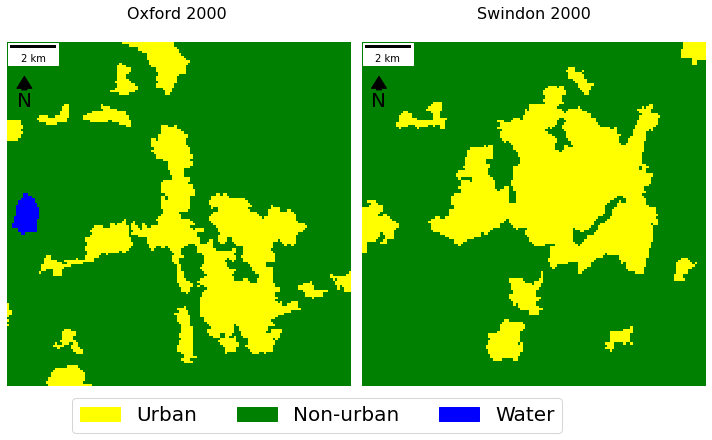

In [20]:
fig,axes = plt.subplots(1,2,figsize=(10,8))
cmap = ListedColormap(["green", "yellow", "blue"])
chm_plot = axes[0].matshow(w_oxford_water,cmap=cmap)
axes[0].set_title('Oxford 2000 ', fontsize=16)
_ = axes[0].axis('off')
scalebar = ScaleBar(100,location='upper left') # 1 pixel = 0.2 meter
axes[0].add_artist(scalebar)
x, y, arrow_length = 0.05, 0.9, 0.073
axes[0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axes[0].transAxes)
cmap = ListedColormap(["green", "yellow"])
chm_plot = axes[1].matshow(w_swindon_water,cmap=cmap)
axes[1].set_title('Swindon 2000', fontsize=16)
_ = axes[1].axis('off')
scalebar = ScaleBar(100,location='upper left') # 1 pixel = 0.2 meter
axes[1].add_artist(scalebar)
x, y, arrow_length = 0.05, 0.9, 0.073
axes[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axes[1].transAxes)
yellow_patch = mpatches.Patch(color='yellow', label='Urban')
green_patch = mpatches.Patch(color='green', label='Non-urban')
blue_patch = mpatches.Patch(color='blue', label='Water')
_ = fig.legend(handles=[yellow_patch,green_patch,blue_patch], bbox_to_anchor=(0.8,0.198),fontsize=20, ncol=3)
fig.tight_layout()

# 1. Constrained Cellular Automata Model
* Demonstrate the usage of function CCA.CCA_last_snapshot: Simulate Oxford and Swindon from a blank map (excluding water area)

In [9]:
#Simulate Oxford 2000 from blank: iter_num=164;trans_num=25
oxford_para = [5.15,68.57,1.35,4.50]
initial_landmap = w_oxford_water.copy()
initial_landmap[w_oxford_water!=2] = 0
sim_oxford = CCA.CCA_last_snapshot([oxford_para[0],0,oxford_para[1]],
                                   [0,oxford_para[2],oxford_para[3]],
                                   landmap=initial_landmap,
                                   rows=150,cols=150,iter_num=164,transition_num=25) 

In [10]:
#Simulate Swindon 2000 from blank:iter_num = 256;trans_num=21
swindon_para = [0.12,63.95,0.03,1.17]
initial_landmap = w_swindon_water.copy()
initial_landmap[w_swindon_water!=2] = 0
sim_swindon = CCA.CCA_last_snapshot([swindon_para[0],0,swindon_para[1]],
                                   [0,swindon_para[2],swindon_para[3]],
                                   landmap=initial_landmap,
                                   rows=150,cols=150,iter_num=256,transition_num=21) 

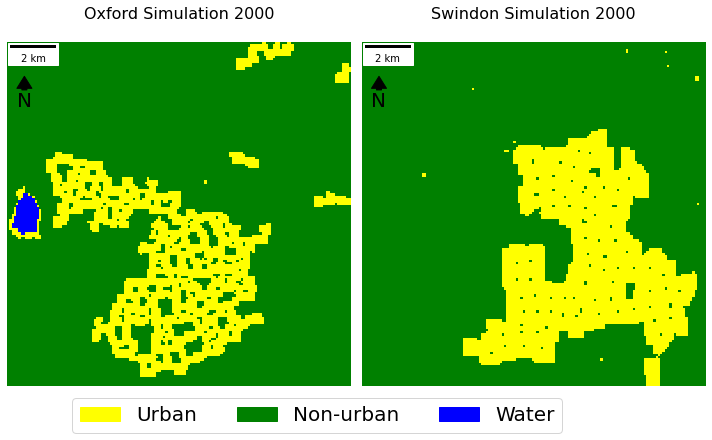

In [21]:
fig,axes = plt.subplots(1,2,figsize=(10,8))
cmap = ListedColormap(["green", "yellow", "blue"])
chm_plot = axes[0].matshow(sim_oxford,cmap=cmap)
axes[0].set_title('Oxford Simulation 2000', fontsize=16)
_ = axes[0].axis('off')
scalebar = ScaleBar(100,location='upper left') # 1 pixel = 0.2 meter
axes[0].add_artist(scalebar)
x, y, arrow_length = 0.05, 0.9, 0.073
axes[0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axes[0].transAxes)
cmap = ListedColormap(["green", "yellow"])
chm_plot = axes[1].matshow(sim_swindon,cmap=cmap)
axes[1].set_title('Swindon Simulation 2000', fontsize=16)
_ = axes[1].axis('off')
scalebar = ScaleBar(100,location='upper left') # 1 pixel = 0.2 meter
axes[1].add_artist(scalebar)
x, y, arrow_length = 0.05, 0.9, 0.073
axes[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axes[1].transAxes)
yellow_patch = mpatches.Patch(color='yellow', label='Urban')
green_patch = mpatches.Patch(color='green', label='Non-urban')
blue_patch = mpatches.Patch(color='blue', label='Water')
_ = fig.legend(handles=[yellow_patch,green_patch,blue_patch], bbox_to_anchor=(0.8,0.198),fontsize=20, ncol=3)
fig.tight_layout()

# 2. Markov Chain Monte Carlo Approximate Bayesian Computation
* Demonstrate the usage of function CCA.CCA_last_snapshot: Simulate Oxford and Swindon from a blank map (excluding water area)
* Check Convergence

In [26]:
#Calling func mcmcabc for Oxford with 20000 iterations(5 for demonstration purpose here)
results1 = MCMCABC.mcmcabc(5,[5.64097946,81.84000592,1.06326021,5.56218198],initial_covmx=MCMCABC.initial_covmx_oxford,iter_num=164,transition_num=25,initial_landmap=MCMCABC.initial_landmap,initial_epsilon=0.25)

accept:  0 [ 7.16487943 67.78008752  1.71243411  6.39875299]
reject:  1 [14.65681298 52.18936166  2.84851986  4.72337685] Distance:  0.3606013565316411
reject:  2 [ 4.08310311 71.61970564  1.97209357  5.09003916] Distance:  0.28777449581939424
reject:  3 [10.44185832 65.08506072  1.24968467  4.45460184] Distance:  0.4526590339795662
accept:  4 [13.1124923  69.86968584  4.30771796  5.91414036]


In [32]:
#Calling func mcmcabc for Swindon with 20000 iterations(5 for demonstration purpose here)
#Switch/uncomment the variable obs_densities_urban to Swindon
results1 = MCMCABC.mcmcabc(5,[10.4523679,80.7589637,2.19134939,1.02197193],initial_covmx=MCMCABC.initial_covmx_swindon,iter_num=256,transition_num=21,initial_landmap=None,initial_epsilon=0.3)

reject:  0 [ 9.68737162 51.36401429  2.44469146  1.74694221] Distance:  0.3429640159525632
reject:  1 [13.10377824 80.57832466  0.77910923  0.65881288] Distance:  0.5636373806417566
reject:  2 [12.38238383 88.28157492  4.94394156  0.92666531] Distance:  0.3291976058776076
reject:  3 [11.59146572 83.63524287  1.73514827  0.52653183] Distance:  0.4189775623810372
accept:  4 [ 6.8436065  85.85901334  2.91178657  1.18517539]


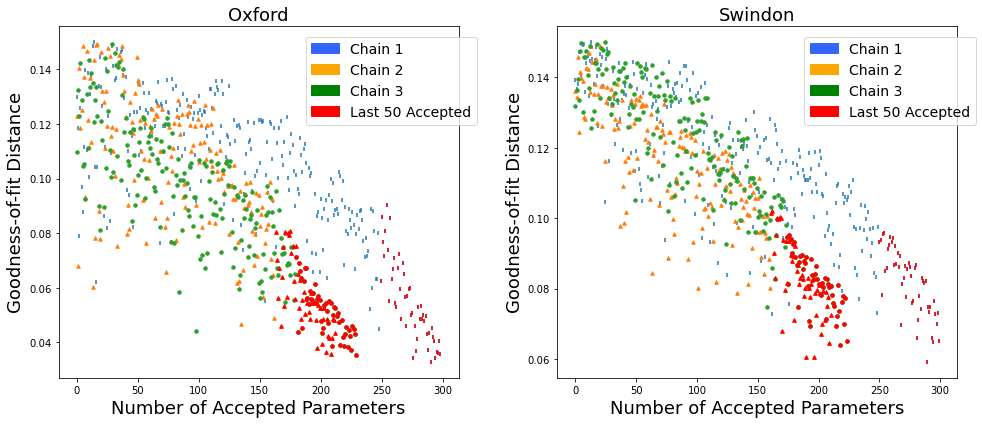

In [28]:
#Result of func mcmcabc - a chain of accepted parameters
markers = ['|','^','o']
fig, axes = plt.subplots(1,2,figsize=(14,6))
results1 = np.load(r'results\Oxford_largeurban3chains1\oxford_largeurban_chain1_2.npy',allow_pickle=True)
results2 = np.load(r'results\Oxford_largeurban3chains1\oxford_largeurban_chain2.npy',allow_pickle=True)
results3 = np.load(r'results\Oxford_largeurban3chains1\oxford_largeurban_chain1.npy',allow_pickle=True)
results = [results1,results2,results3]

for i in range(3):
    axes[0].scatter(np.arange(0,len(results[i][0])),results[i][2],s=12,marker=markers[i])
for i in range(3):
    axes[0].scatter(np.arange(len(results[i][0])-50,len(results[i][0])),results[i][2][-50:],s=12,marker=markers[i],c='red')
    
axes[0].set_title('Oxford',fontsize=18)
axes[0].set_xlabel('Number of Accepted Parameters',fontsize=18)
axes[0].set_ylabel('Goodness-of-fit Distance',fontsize=18)
blue_patch = mpatches.Patch(color='#3366FF', label='Chain 1')
orange_patch = mpatches.Patch(color='orange', label='Chain 2')
green_patch = mpatches.Patch(color='green', label='Chain 3')
red_patch = mpatches.Patch(color='red', label='Last 50 Accepted')
_ = axes[0].legend(handles=[blue_patch,orange_patch,green_patch,red_patch], bbox_to_anchor=(0.6,0.7),fontsize=14)


results1 = np.load(r'results\Swindon_largeurban3chains\swindon_largeurban_chain1.npy',allow_pickle=True)
results2 = np.load(r'results\Swindon_largeurban3chains\swindon_largeurban_chain2.npy',allow_pickle=True)
results3 = np.load(r'results\Swindon_largeurban3chains\swindon_largeurban_chain3.npy',allow_pickle=True)
results = [results1,results2,results3]
for i in range(3):
    axes[1].scatter(np.arange(0,len(results[i][0])),results[i][2],s=12,marker=markers[i])
for i in range(3):
    axes[1].scatter(np.arange(len(results[i][0])-50,len(results[i][0])),results[i][2][-50:],s=12,marker=markers[i],c='red')
axes[1].set_title('Swindon',fontsize=18)
axes[1].set_xlabel('Number of Accepted Parameters',fontsize=18)
axes[1].set_ylabel('Goodness-of-fit Distance',fontsize=18)
blue_patch = mpatches.Patch(color='#3366FF', label='Chain 1')
orange_patch = mpatches.Patch(color='orange', label='Chain 2')
green_patch = mpatches.Patch(color='green', label='Chain 3')
red_patch = mpatches.Patch(color='red', label='Last 50 Accepted')
_ = axes[1].legend(handles=[blue_patch,orange_patch,green_patch,red_patch], bbox_to_anchor=(0.6,0.7),fontsize=14)

fig.tight_layout()

In [33]:
#Define function gelman_rubin to calculate 3 chains' 𝑅̂ 
#Adapt from https://rlhick.people.wm.edu/stories/bayesian_5.html
def gelman_rubin(burn_in,length,chain1,chain2,chain3,i):
    #length of chain to discard
    burn_in = burn_in
    #length of chain to be used for R^
    length = length
    results1 = np.array(chain1)
    results2 = np.array(chain2)
    results3 = np.array(chain3)
    n = results1[burn_in:burn_in+length].shape[1]

    #Calculate within chain variance
    W = (results1[i,:][burn_in:burn_in+length].std()**2+results2[i,:][burn_in:burn_in+length].std()**2+\
         results3[i,:][burn_in:burn_in+length].std()**2)/3
    #Calculate between chain variance
    mean1 = results1[i,:][burn_in:burn_in+length].mean()
    mean2 = results2[i,:][burn_in:burn_in+length].mean()
    mean3 = results3[i,:][burn_in:burn_in+length].mean()
    mean = (mean1 + mean2+ mean3)/3
    B = n * ((mean1 - mean)**2 + (mean2 - mean)**2+ (mean3 - mean)**2)/2
    #Calculate the estimated variance of parameter as the weighted sum of between and within chain variance
    var_theta = (1 - 1/n) * W + 1/n*B
    return np.sqrt(var_theta/W)

In [41]:
###### Calculate R^ of Oxford 3 Chains: burn-in 50, length 251
#Oxford 3 chains
results1 = np.load(r'results\Oxford_largeurban3chains1\oxford_largeurban_chain1_2.npy',allow_pickle=True)
results2 = np.load(r'results\Oxford_largeurban3chains1\oxford_largeurban_chain2.npy',allow_pickle=True)
results3 = np.load(r'results\Oxford_largeurban3chains1\oxford_largeurban_chain1.npy',allow_pickle=True)

chain1, chain2, chain3 = [],[],[]
chains = [chain1, chain2, chain3]
results = [results1,results2,results3]
for i in range(3):
    C1,C3,C5,C6=[],[],[],[]
    for para_set in results[i][0]:
        C1.append(para_set[0])
        C3.append(para_set[1])
        C5.append(para_set[2])
        C6.append(para_set[3])
    chains[i].append(C1)
    chains[i].append(C3)
    chains[i].append(C5)
    chains[i].append(C6)
    
print('C1 R^ = ', gelman_rubin(40,173,chain3,chain1,chain2,0))
print('C3 R^ = ', gelman_rubin(40,173,chain3,chain1,chain2,1))
print('C5 R^ = ', gelman_rubin(40,173,chain3,chain1,chain2,2))
print('C6 R^ = ', gelman_rubin(40,173,chain3,chain1,chain2,3))

C1 R^ =  1.0116468375431353
C3 R^ =  1.0212265304699475
C5 R^ =  1.0219636093588473
C6 R^ =  1.0165875625696725


In [40]:
results1 = np.load(r'results\Swindon_largeurban3chains\swindon_largeurban_chain1.npy',allow_pickle=True)
results2 = np.load(r'results\Swindon_largeurban3chains\swindon_largeurban_chain2.npy',allow_pickle=True)
results3 = np.load(r'results\Swindon_largeurban3chains\swindon_largeurban_chain3.npy',allow_pickle=True)

chain1, chain2, chain3 = [],[],[]
chains = [chain1, chain2, chain3]
results = [results1,results2,results3]
for i in range(3):
    C1,C3,C5,C6=[],[],[],[]
    for para_set in results[i][0]:
        C1.append(para_set[0])
        C3.append(para_set[1])
        C5.append(para_set[2])
        C6.append(para_set[3])
    chains[i].append(C1)
    chains[i].append(C3)
    chains[i].append(C5)
    chains[i].append(C6)

#Calculate R^ of Swindon 3 chains: burn-in 100, length 59
print('C1 R^ = ', gelman_rubin(50,161,chain1,chain2,chain3,0))
print('C3 R^ = ', gelman_rubin(50,161,chain1,chain2,chain3,1))
print('C5 R^ = ', gelman_rubin(50,161,chain1,chain2,chain3,2))
print('C6 R^ = ', gelman_rubin(50,161,chain1,chain2,chain3,3))

C1 R^ =  1.018678154515802
C3 R^ =  1.0897924439001425
C5 R^ =  1.020408679543551
C6 R^ =  1.0310485719947462
